#### Hannah M. Padgette
##### Mathematical & Computational Modeling of Infectious Diseases
##### D.B. Larremore
##### Homework 3 - due 19 March 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import seaborn as sns
from scipy.stats import nbinom

colors = sns.light_palette("seagreen", 10)

**Problem 2**. The goal of this problem is to explore the preferential depletion of susceptibles. 

Consider a population with four equal-sized groups, numbered $1, 2, 3, 4$. Suppose that the contact structure in the population is fully mixed (i.e. $c_{ij} = \bar{c}$ for all $i,j$), that $\gamma_i = 3$ for all $i$, and that $R_0=1.5$, under SIR dynamics. Finally, suppose that the susceptibility for group $1$ is $p_1=1$, the susceptibility for group $2$ is $p_2=2$, with $p_3 = 3$ and $p_4=4$.

*Part C*. Using these parameters, code up a version of your model with initial conditions where $99.9\%$ of people in each group are susceptible, and the other $0.1\%$ are infected. Simulate an epidemic wave using an appropriate timestep $\Delta t$ and appropriate maximum simulation time to capture the wave. Create a plot of the four populations' $I$ compartments vs time, showing $i_1(t)$, $i_2(t)$, $i_3(t)$, and $i_4(t)$. Color these curves in a single hue, but with varying levels of light/dark or saturation, such that the boldest and darkest line is the most susceptible group, and the faintest and lightest line is the least susceptible group.

* Note: You'll have to modify your code to cope with the fact that there are now 4 groups!

In [2]:
def SIR_4groups(s0,i0,r0,t0,tf,delta_t,Dp,C,Dw_inv,Dgamma):
    '''
    A function which uses Euler's method to solve the SIR model for 4, equal-sized groups in a population.
    
    Inputs:
        s0 = A 4x1 vector of initial conditions for the susceptible populations of all 4 groups. 
        i0 = A 4x1 vector of initial conditions for the infected populations of all 4 groups. 
        r0 = A 4x1 vector of initial conditions for the recovered populations of all 4 groups. 
        t0 = The starting time for the simulation.
        tf = The ending time for the simulation. 
        delta_t = The time-step for Euler's method
        Dp = A 4x4 diagonal matrix w/ entries of each group's susceptibility, p, on the diagonal.
        C = A 4x4 contact matrix for the groups in the population.
        Dw_int = A 4x4 diagonal matrix w/ entries of each group's omega_n^(-1), p, on the diagonal.
    
    Outputs:
    
    '''

    n = int((tf-t0)/delta_t+1) # count the number of timepoints
    t = np.linspace(t0,tf,n)   # create a time vector 
    
    # S, I, and R vectors are 4xn matrices where each row corresonds to s_n(t)
    s = np.zeros((4,n))        # initialize a 4xn matrix for the solution of ds/dt -> s(t)
    i = np.zeros((4,n))        # initialize a 4xn matrix for the solution of di/dt -> i(t)
    r = np.zeros((4,n))        # initialize a 4xn matrix for the solution of dr/dt -> r(t)

    s[:,0]=s0.flatten() # define the first point in S(t)
    i[:,0]=i0.flatten() # define the first point in I(t)
    r[:,0]=r0.flatten() # define the first point in R(t)

    for x in range(1,len(t)): # loop thru each solution vector starting at index 1 
        s[:,x] = s[:,x-1] + delta_t * (-np.diag(s[:,x-1]) @ Dp @ C @ Dw_inv @ i[:,x-1])
        i[:,x] = i[:,x-1] + delta_t * ((np.diag(s[:,x-1]) @ Dp @ C @ Dw_inv @ i[:,x-1]) - (Dgamma@i[:,x-1]))
        r[:,x] = r[:,x-1] + delta_t * (Dgamma@i[:,x-1])

    return(s,i,r,t)

In [3]:
s0 = np.array([[0.999],[0.999],[0.999],[0.999]])
i0 = np.array([[0.001],[0.001],[0.001],[0.001]])
r0 = np.array([[0],[0],[0],[0]])

Dp = np.diag([1,2,3,4]) 
C = np.full(shape=(4,4),fill_value=0.45)
Dw_inv = np.diag([4,4,4,4])
Dgamma = np.diag([3,3,3,3])

t0 = 0
tf = 5
delta_t = 0.01

In [4]:
s,i,r,t = SIR_4groups(s0,i0,r0,t0,tf,delta_t,Dp,C,Dw_inv,Dgamma)

i1 = i[0,:]
i2 = i[1,:]
i3 = i[2,:]
i4 = i[3,:]

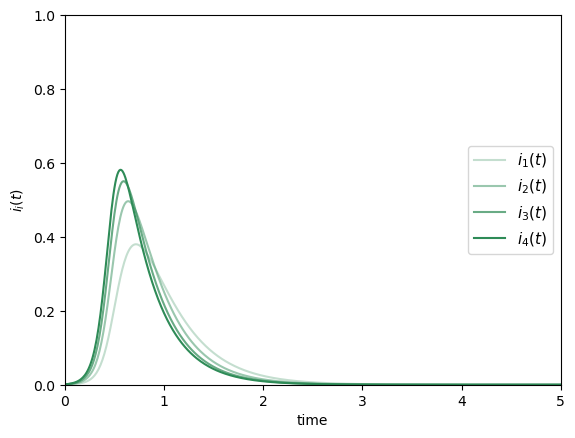

In [5]:
fig, ax = plt.subplots()

colors = sns.light_palette("seagreen", 10)

ax.plot(t,i1,color=colors[6],label=r'$i_1(t)$',alpha=0.4)
ax.plot(t,i2,color=colors[7],label=r'$i_2(t)$',alpha=0.6)
ax.plot(t,i3,color=colors[8],label=r'$i_3(t)$',alpha=0.8)
ax.plot(t,i4,color=colors[9],label=r'$i_4(t)$',alpha=1)

ax.set_xlabel('time')
ax.set_ylabel(r'$i_i(t)$')

ax.set_xlim(0,tf)
ax.set_ylim(0,1)

plt.legend(loc='center right',fontsize=11)

plt.savefig("HPadgette_CSCI7000_HW3_prob2c.png", bbox_inches="tight", dpi=300)

*Part d*. Define the average relative susceptibility among the susceptibles at any point in time $\bar{p}(t)$ as

$$\bar{p}(t) = \frac{\displaystyle \sum_{i=1}^4 p_i\,s_i(t)}{\displaystyle \sum_{i=1}^4 s_i(t)}$$

Note that this is simply a weighted average of the susceptibilities of the susceptibles, by adding up the susceptibilities in the numerator and dividing by the number of susceptibles in the denominator. Over the same time window as your previous plot, create two addition figures: First, show $s_i(t)$ for each $i=1, 2, 3, 4$ using the same color scheme as before. Second, show $\bar{p}(t)$ in black. 

In [6]:
s1 = s[0,:]
s2 = s[1,:]
s3 = s[2,:]
s4 = s[3,:]

In [7]:
sum_p_s = np.zeros(len(t))
sum_s = np.zeros(len(t))
pbar = np.zeros(len(t))

for x in range(0,len(t)-1):
    sum_p_s[x] = (1*s1[x]) + (2*s2[x]) + (3*s3[x]) + (4*s4[x])
    sum_s[x] = s1[x] + s2[x] + s3[x] + s4[x]
    pbar[x] = sum_p_s[x] / sum_s[x]


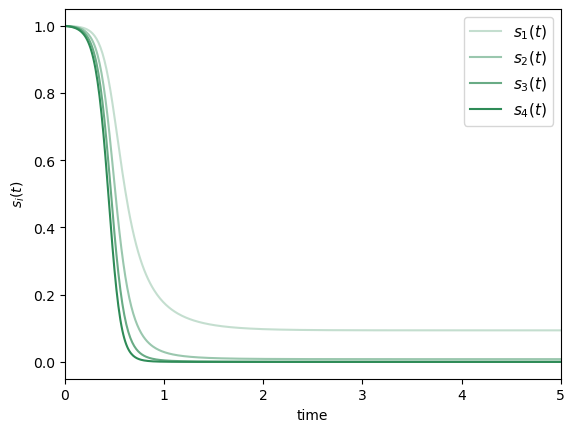

In [8]:
fig, ax = plt.subplots()

ax.plot(t,s1,color=colors[6],label=r'$s_1(t)$',alpha=0.4)
ax.plot(t,s2,color=colors[7],label=r'$s_2(t)$',alpha=0.6)
ax.plot(t,s3,color=colors[8],label=r'$s_3(t)$',alpha=0.8)
ax.plot(t,s4,color=colors[9],label=r'$s_4(t)$',alpha=1)
# ax.plot(t[0:-1],pbar[0:-1],color='k',label=r'$\bar{p}(t)$',alpha=1)

ax.set_xlabel('time')
ax.set_ylabel(r'$s_i(t)$')

ax.set_xlim(0,tf)
# ax.set_ylim(0,1)

plt.legend(loc='upper right',fontsize=11)

plt.savefig("HPadgette_CSCI7000_HW3_prob2d_1.png", bbox_inches="tight", dpi=300)

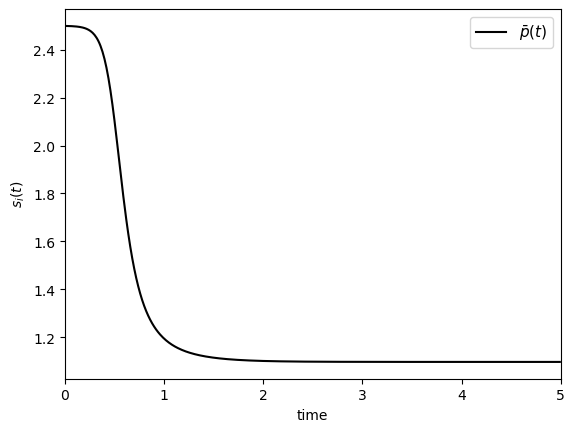

In [9]:
fig, ax = plt.subplots()

# ax.plot(t,s1,color=colors[6],label=r'$s_1(t)$',alpha=0.4)
# ax.plot(t,s2,color=colors[7],label=r'$s_2(t)$',alpha=0.6)
# ax.plot(t,s3,color=colors[8],label=r'$s_3(t)$',alpha=0.8)
# ax.plot(t,s4,color=colors[9],label=r'$s_4(t)$',alpha=1)
ax.plot(t[0:-1],pbar[0:-1],color='k',label=r'$\bar{p}(t)$',alpha=1)

ax.set_xlabel('time')
ax.set_ylabel(r'$s_i(t)$')

ax.set_xlim(0,tf)
# ax.set_ylim(0,1)

plt.legend(loc='upper right',fontsize=11)

plt.savefig("HPadgette_CSCI7000_HW3_prob2d_2.png", bbox_inches="tight", dpi=300)

**Problem 3**. The goal of this problem is to explore branching processes, and how superspreading can, perhaps surprisingly, increase the likelihood that an outbreak never grows to a large size.

In [10]:
def nbinom_branching(n,p,Z0,population_cutoff):
    Z = Z0  # Z0=1, starting from a single infection
    draw = nbinom.rvs(n=n, p=p, size=Z)  # how many infections result from the inital single infection?

    G = 0     # the single, intial infection is the first generation
    flag = 0  # used to track if the epidemic dies in a finite time
    epidemicSize = np.array([Z0]) # used to track the epidemic size from generation to generation
    
    while Z > 0:
        draws = nbinom.rvs(n=n, p=p, size=Z)
        Z = sum(draws)
        G += 1
        epidemicSize = np.append(epidemicSize,Z)
        if Z > population_cutoff:
            flag = 1
            break

    # if flag == 0:
    #     print('Finite Simulation - Extinction reached after', G, 'generations.')
    # if flag == 1: 
    #     print('"Infinite" Simulation - Population size exceeded', population_cutoff, 'after', G, 'generations. Simulation terminated.')
    
    return G, flag, epidemicSize

In [11]:
# setting up the parameters for the negative binomial distribution
k = 0.1  # dispersion Parameter, k
R0 = 3   # mean, R0
mean = R0
variance = mean + (mean ** 2) / k
p = mean / variance
n = mean ** 2 / (variance - mean)

Z0 = 1
popCutoff = 2500

m = 100000
outcomes = np.zeros(m, dtype=int) 
epidemicMax = np.zeros(m, dtype=int) 
    
# run nbinom_branching m times
for i in range(m):
    G,flag,epidemicSize = nbinom_branching(n,p,Z0,popCutoff)
    outcomes[i] = flag
    epidemicMax[i] = np.max(epidemicSize)
    
# count the number of times flag == 0, the simulation ends in a finite amount of time
count_flag = np.sum(outcomes==0)
prob_k0p1 = count_flag/m
finiteEpidemicMax_k0p1 = epidemicMax[outcomes == 0]

print(f'Probability that the epidemic ends in a finite amount of time: {prob_k0p1:.3f}')
print(f'Maximum epidemic size: {np.max(finiteEpidemicMax_k0p1)}')

Probability that the epidemic ends in a finite amount of time: 0.838
Maximum epidemic size: 50


Probability that the epidemic ends in a finite amount of time: 0.839
Maximum epidemic size: 50


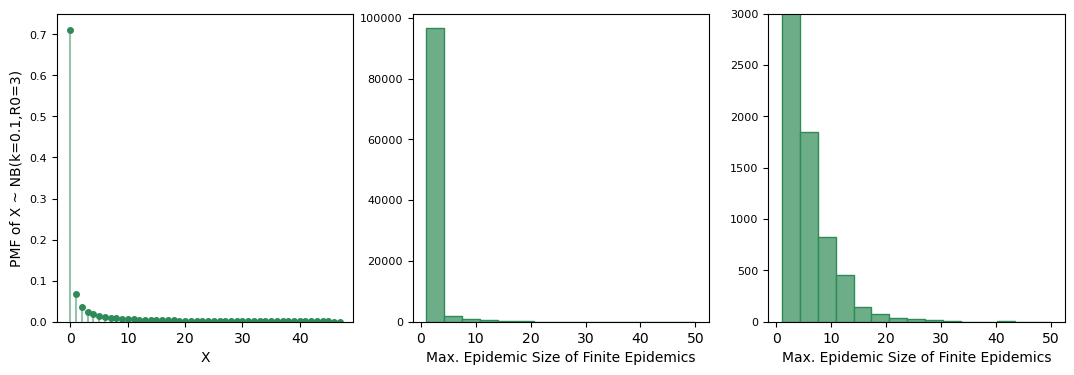

In [12]:
# for the EC problem: if we have less than 100,000 finite outcomes, continue running until we have 100,000

while count_flag < 100000:
    G,flag,epidemicSize = nbinom_branching(n,p,Z0,popCutoff)
    outcomes = np.append(outcomes,flag)
    epidemicMax = np.append(epidemicMax,np.max(epidemicSize))
    count_flag = np.sum(outcomes==0)

prob_k0p1 = count_flag/np.size(outcomes)
finiteEpidemicMax_k0p1 = epidemicMax[outcomes == 0]

print(f'Probability that the epidemic ends in a finite amount of time: {prob_k0p1:.3f}')
print(f'Maximum epidemic size: {np.max(finiteEpidemicMax_k0p1)}')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,4))

# code for plotting nbinom PMF adapted from scipy documentation
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html
x = np.arange(nbinom.ppf(0.01, n, p), nbinom.ppf(0.99, n, p)) # range of x values from the bottom 1% to the top 1% of the dist. 
ax1.plot(x, nbinom.pmf(x, n, p), 'o', ms=4, label='nbinom pmf', color=colors[9]) # plot the PMF
ax1.vlines(x, 0, nbinom.pmf(x, n, p), colors=colors[9], alpha=0.5) # make vertical lines
ax1.set_ylim(0,0.75)
ax1.set_ylabel(f'PMF of X ~ NB(k={k},R0={R0})')
ax1.set_xlabel(f'X')
ax1.yaxis.set_tick_params(labelsize=8)

# plotting the distribution of the maximum epidemic size for all finite epidemics, no scaling
ax2.hist(finiteEpidemicMax_k0p1, bins=15, color=colors[6], edgecolor=colors[9])
ax2.set_xlabel(f'Max. Epidemic Size of Finite Epidemics')
ax2.yaxis.set_tick_params(labelsize=8)

# plotting the distribution of the maximum population size for all finite epidemics, zoomed in to see bins other than Z=1
ax3.hist(finiteEpidemicMax_k0p1, bins=15, color=colors[6], edgecolor=colors[9])
ax3.set_ylim(0,3000)
ax3.set_xlabel(f'Max. Epidemic Size of Finite Epidemics')
ax3.yaxis.set_tick_params(labelsize=8)

plt.savefig("HPadgette_CSCI7000_HW3_prob3_k0p1.png", bbox_inches="tight", dpi=300)

In [13]:
# setting up the parameters for the negative binomial distribution
k = 0.5  # dispersion Parameter, k
R0 = 3   # mean, R0
mean = R0
variance = mean + (mean ** 2) / k
p = mean / variance
n = mean ** 2 / (variance - mean)

Z0 = 1
popCutoff = 2500

m = 100000
outcomes = np.zeros(m, dtype=int) 
epidemicMax = np.zeros(m, dtype=int) 
    
# run nbinom_branching m times
for i in range(m):
    G,flag,epidemicSize = nbinom_branching(n,p,Z0,popCutoff)
    outcomes[i] = flag
    epidemicMax[i] = np.max(epidemicSize)
    
# count the number of times flag == 0, the simulation ends in a finite amount of time
count_flag = np.sum(outcomes==0)
prob_k0p5 = count_flag/m
finiteEpidemicMax_k0p5 = epidemicMax[outcomes == 0]

print(f'Probability that the epidemic ends in a finite amount of time: {prob_k0p5:.3f}')
print(f'Maximum epidemic size: {np.max(finiteEpidemicMax_k0p5)}')

Probability that the epidemic ends in a finite amount of time: 0.501
Maximum epidemic size: 13


Probability that the epidemic ends in a finite amount of time: 0.501
Maximum epidemic size: 17


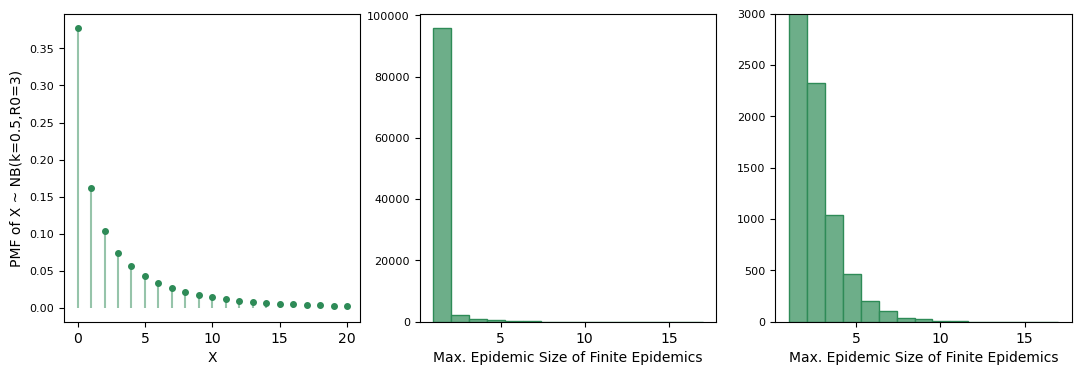

In [14]:
# for the EC problem: if we have less than 100,000 finite outcomes, continue running until we have 100,000

while count_flag < 100000:
    G,flag,epidemicSize = nbinom_branching(n,p,Z0,popCutoff)
    outcomes = np.append(outcomes,flag)
    epidemicMax = np.append(epidemicMax,np.max(epidemicSize))
    count_flag = np.sum(outcomes==0)

prob_k0p5 = count_flag/np.size(outcomes)
finiteEpidemicMax_k0p5 = epidemicMax[outcomes == 0]

print(f'Probability that the epidemic ends in a finite amount of time: {prob_k0p5:.3f}')
print(f'Maximum epidemic size: {np.max(finiteEpidemicMax_k0p5)}')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,4))

# code for plotting nbinom PMF adapted from scipy documentation
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html
x = np.arange(nbinom.ppf(0.01, n, p), nbinom.ppf(0.99, n, p)) # range of x values from the bottom 1% to the top 1% of the dist. 
ax1.plot(x, nbinom.pmf(x, n, p), 'o', ms=4, label='nbinom pmf', color=colors[9]) # plot the PMF
ax1.vlines(x, 0, nbinom.pmf(x, n, p), colors=colors[9], alpha=0.5) # make vertical lines
# ax1.set_ylim(0,0.75)
ax1.set_ylabel(f'PMF of X ~ NB(k={k},R0={R0})')
ax1.set_xlabel(f'X')
ax1.yaxis.set_tick_params(labelsize=8)

# plotting the distribution of the maximum epidemic size for all finite epidemics, no scaling
ax2.hist(finiteEpidemicMax_k0p5, bins=15, color=colors[6], edgecolor=colors[9])
ax2.set_xlabel(f'Max. Epidemic Size of Finite Epidemics')
ax2.yaxis.set_tick_params(labelsize=8)

# plotting the distribution of the maximum population size for all finite epidemics, zoomed in to see bins other than Z=1
ax3.hist(finiteEpidemicMax_k0p5, bins=15, color=colors[6], edgecolor=colors[9])
ax3.set_ylim(0,3000)
ax3.set_xlabel(f'Max. Epidemic Size of Finite Epidemics')
ax3.yaxis.set_tick_params(labelsize=8)

plt.savefig("HPadgette_CSCI7000_HW3_prob3_k0p5.png", bbox_inches="tight", dpi=300)

In [15]:
# setting up the parameters for the negative binomial distribution
k = 1.0  # dispersion Parameter, k
R0 = 3   # mean, R0
mean = R0
variance = mean + (mean ** 2) / k
p = mean / variance
n = mean ** 2 / (variance - mean)

Z0 = 1
popCutoff = 2500

m = 100000
outcomes = np.zeros(m, dtype=int) 
epidemicMax = np.zeros(m, dtype=int) 
    
# run nbinom_branching m times
for i in range(m):
    G,flag,epidemicSize = nbinom_branching(n,p,Z0,popCutoff)
    outcomes[i] = flag
    epidemicMax[i] = np.max(epidemicSize)
    
# count the number of times flag == 0, the simulation ends in a finite amount of time
count_flag = np.sum(outcomes==0)
prob_k1 = count_flag/m
finiteEpidemicMax_k1 = epidemicMax[outcomes == 0]

print(f'Probability that the epidemic ends in a finite amount of time: {prob_k1:.3f}')
print(f'Maximum epidemic size: {np.max(finiteEpidemicMax_k1)}')

Probability that the epidemic ends in a finite amount of time: 0.332
Maximum epidemic size: 9


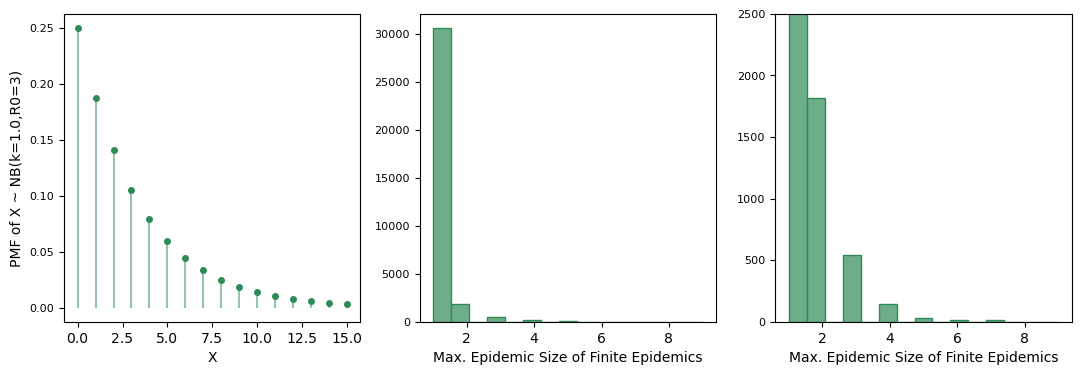

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,4))

# code for plotting nbinom PMF adapted from scipy documentation
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html
x = np.arange(nbinom.ppf(0.01, n, p), nbinom.ppf(0.99, n, p)) # range of x values from the bottom 1% to the top 1% of the dist. 
ax1.plot(x, nbinom.pmf(x, n, p), 'o', ms=4, label='nbinom pmf', color=colors[9]) # plot the PMF
ax1.vlines(x, 0, nbinom.pmf(x, n, p), colors=colors[9], alpha=0.5) # make vertical lines
# ax1.set_ylim(0,0.75)
ax1.set_ylabel(f'PMF of X ~ NB(k={k},R0={R0})')
ax1.set_xlabel(f'X')
ax1.yaxis.set_tick_params(labelsize=8)

# plotting the distribution of the maximum epidemic size for all finite epidemics, no scaling
ax2.hist(finiteEpidemicMax_k1, bins=15, color=colors[6], edgecolor=colors[9])
ax2.set_xlabel(f'Max. Epidemic Size of Finite Epidemics')
ax2.yaxis.set_tick_params(labelsize=8)

# plotting the distribution of the maximum population size for all finite epidemics, zoomed in to see bins other than Z=1
ax3.hist(finiteEpidemicMax_k1, bins=15, color=colors[6], edgecolor=colors[9])
ax3.set_ylim(0,2500)
ax3.set_xlabel(f'Max. Epidemic Size of Finite Epidemics')
ax3.yaxis.set_tick_params(labelsize=8)

plt.savefig("HPadgette_CSCI7000_HW3_prob3_k1.png", bbox_inches="tight", dpi=300)

In [17]:
# setting up the parameters for the negative binomial distribution
k = 5.0  # dispersion Parameter, k
R0 = 3   # mean, R0
mean = R0
variance = mean + (mean ** 2) / k
p = mean / variance
n = mean ** 2 / (variance - mean)

Z0 = 1
popCutoff = 2500

m = 100000
outcomes = np.zeros(m, dtype=int) 
epidemicMax = np.zeros(m, dtype=int) 
    
# run nbinom_branching m times
for i in range(m):
    G,flag,epidemicSize = nbinom_branching(n,p,Z0,popCutoff)
    outcomes[i] = flag
    epidemicMax[i] = np.max(epidemicSize)
    
# count the number of times flag == 0, the simulation ends in a finite amount of time
count_flag = np.sum(outcomes==0)
prob_k5 = count_flag/m
finiteEpidemicMax_k5 = epidemicMax[outcomes == 0]

print(f'Probability that the epidemic ends in a finite amount of time: {prob_k5:.3f}')
print(f'Maximum epidemic size: {np.max(finiteEpidemicMax_k5)}')

Probability that the epidemic ends in a finite amount of time: 0.120
Maximum epidemic size: 5


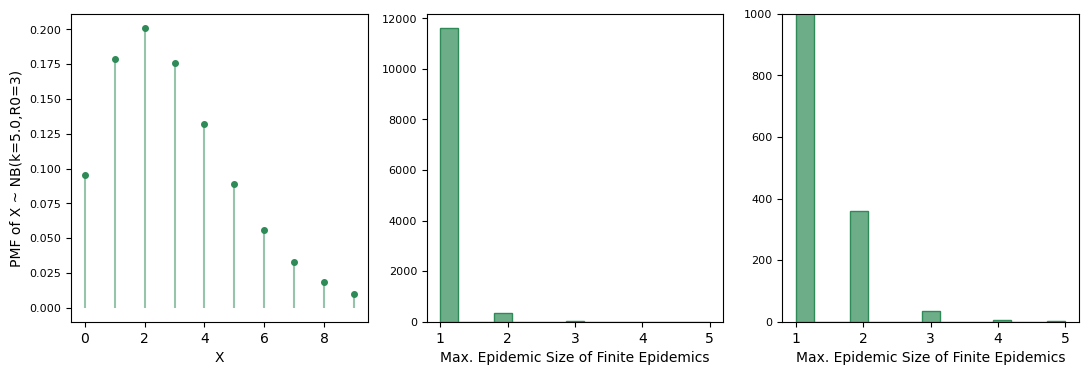

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,4))

# code for plotting nbinom PMF adapted from scipy documentation
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html
x = np.arange(nbinom.ppf(0.01, n, p), nbinom.ppf(0.99, n, p)) # range of x values from the bottom 1% to the top 1% of the dist. 
ax1.plot(x, nbinom.pmf(x, n, p), 'o', ms=4, label='nbinom pmf', color=colors[9]) # plot the PMF
ax1.vlines(x, 0, nbinom.pmf(x, n, p), colors=colors[9], alpha=0.5) # make vertical lines
# ax1.set_ylim(0,0.75)
ax1.set_ylabel(f'PMF of X ~ NB(k={k},R0={R0})')
ax1.set_xlabel(f'X')
ax1.yaxis.set_tick_params(labelsize=8)

# plotting the distribution of the maximum epidemic size for all finite epidemics, no scaling
ax2.hist(finiteEpidemicMax_k5, bins=15, color=colors[6], edgecolor=colors[9])
ax2.set_xlabel(f'Max. Epidemic Size of Finite Epidemics')
ax2.yaxis.set_tick_params(labelsize=8)

# plotting the distribution of the maximum population size for all finite epidemics, zoomed in to see bins other than Z=1
ax3.hist(finiteEpidemicMax_k5, bins=15, color=colors[6], edgecolor=colors[9])
ax3.set_ylim(0,1000)
ax3.set_xlabel(f'Max. Epidemic Size of Finite Epidemics')
ax3.yaxis.set_tick_params(labelsize=8)

plt.savefig("HPadgette_CSCI7000_HW3_prob3_k5.png", bbox_inches="tight", dpi=300)

In [19]:
# setting up the parameters for the negative binomial distribution
k = 10.0  # dispersion Parameter, k
R0 = 3   # mean, R0
mean = R0
variance = mean + (mean ** 2) / k
p = mean / variance
n = mean ** 2 / (variance - mean)

Z0 = 1
popCutoff = 2500

m = 100000
outcomes = np.zeros(m, dtype=int) 
epidemicMax = np.zeros(m, dtype=int) 
    
# run nbinom_branching m times
for i in range(m):
    G,flag,epidemicSize = nbinom_branching(n,p,Z0,popCutoff)
    outcomes[i] = flag
    epidemicMax[i] = np.max(epidemicSize)
    
# count the number of times flag == 0, the simulation ends in a finite amount of time
count_flag = np.sum(outcomes==0)
prob_k10 = count_flag/m
finiteEpidemicMax_k10 = epidemicMax[outcomes == 0]

print(f'Probability that the epidemic ends in a finite amount of time: {prob_k10:.3f}')
print(f'Maximum epidemic size: {np.max(finiteEpidemicMax_k10)}')

Probability that the epidemic ends in a finite amount of time: 0.089
Maximum epidemic size: 5


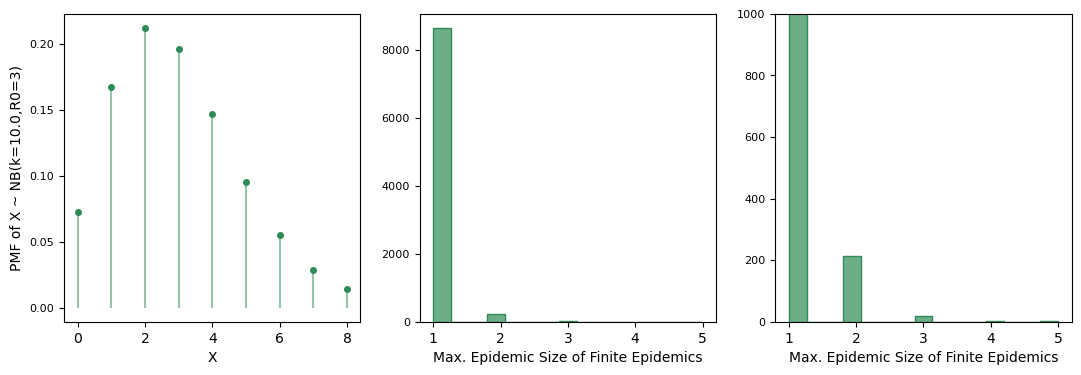

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,4))

# code for plotting nbinom PMF adapted from scipy documentation
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html
x = np.arange(nbinom.ppf(0.01, n, p), nbinom.ppf(0.99, n, p)) # range of x values from the bottom 1% to the top 1% of the dist. 
ax1.plot(x, nbinom.pmf(x, n, p), 'o', ms=4, label='nbinom pmf', color=colors[9]) # plot the PMF
ax1.vlines(x, 0, nbinom.pmf(x, n, p), colors=colors[9], alpha=0.5) # make vertical lines
# ax1.set_ylim(0,0.75)
ax1.set_ylabel(f'PMF of X ~ NB(k={k},R0={R0})')
ax1.set_xlabel(f'X')
ax1.yaxis.set_tick_params(labelsize=8)

# plotting the distribution of the maximum epidemic size for all finite epidemics, no scaling
ax2.hist(finiteEpidemicMax_k10, bins=15, color=colors[6], edgecolor=colors[9])
ax2.set_xlabel(f'Max. Epidemic Size of Finite Epidemics')
ax2.yaxis.set_tick_params(labelsize=8)

# plotting the distribution of the maximum population size for all finite epidemics, zoomed in to see bins other than Z=1
ax3.hist(finiteEpidemicMax_k10, bins=15, color=colors[6], edgecolor=colors[9])
ax3.set_ylim(0,1000)
ax3.set_xlabel(f'Max. Epidemic Size of Finite Epidemics')
ax3.yaxis.set_tick_params(labelsize=8)

plt.savefig("HPadgette_CSCI7000_HW3_prob3_k10.png", bbox_inches="tight", dpi=300)